## DESAFIO SEMANA 9 - ACELERADEV DATA SCIENCE
> O objetivo desse desafio é **descobrir** quem fe

In [24]:
#Importando as bibliotecas necessárias
import functools
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_blobs, make_classification
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [25]:
#Leitura dos datasets 
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [26]:
#Visualizando as colunas de cada dataset
print('Colunas de data_train:')
data_train.columns.values

Colunas de data_train:


array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO',
       'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO',

In [27]:
print('Colunas de data_test:')
data_test.columns.values

Colunas de data_test:


array(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047'], dtype=object)

In [60]:
#Deixa o dataset com as mesmas colunas
colunas_diferentes = list(set(data_train.columns).difference(set(data_test.columns)))
print('As colunas diferentes entre o data_train e data_test é:', colunas_diferentes)

#remove in_treineiro para ele não ser removido de data_train
colunas_diferentes.remove('IN_TREINEIRO')

data_train.drop(colunas_diferentes, axis=1, inplace=True)

As colunas diferentes entre o data_train e data_test é: ['IN_LEITURA_LABIAL', 'IN_LAMINA_OVERLAY', 'TX_RESPOSTAS_CN', 'Q038', 'IN_SEM_RECURSO', 'IN_MOBILIARIO_OBESO', 'IN_MARCA_PASSO', 'Q042', 'IN_MEDIDOR_GLICOSE', 'Q048', 'IN_PROVA_DEITADO', 'Q007', 'Q035', 'IN_DEFICIENCIA_MENTAL', 'Q029', 'NO_MUNICIPIO_RESIDENCIA', 'Q039', 'Q028', 'IN_SALA_ACOMPANHANTE', 'IN_MEDICAMENTOS', 'CO_MUNICIPIO_NASCIMENTO', 'Q036', 'NU_ANO', 'Q032', 'Q008', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_ACESSO', 'Q046', 'IN_DEFICIT_ATENCAO', 'IN_MESA_CADEIRA_RODAS', 'Q018', 'IN_LACTANTE', 'IN_AMPLIADA_18', 'Q017', 'SG_UF_ENTIDADE_CERTIFICACAO', 'Q034', 'IN_CERTIFICADO', 'Q044', 'NU_NOTA_MT', 'IN_MATERIAL_ESPECIFICO', 'CO_MUNICIPIO_PROVA', 'CO_UF_NASCIMENTO', 'IN_CADEIRA_ACOLCHOADA', 'CO_MUNICIPIO_ESC', 'IN_SONDA', 'CO_PROVA_MT', 'Q011', 'Q037', 'IN_SALA_ESPECIAL', 'IN_SOROBAN', 'IN_MESA_CADEIRA_SEPARADA', 'CO_PROVA_CH', 'Q041', 'Q043', 'IN_NOME_SOCIAL', 'Q019', 'IN_MOBILIARIO_ESPECIFICO', 'IN_DEFICIENCIA_FISICA', 'Q003'

In [62]:
data_train.columns.values

array(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047'], dtype=object)

In [64]:
data_test.columns.values

array(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047'], dtype=object)

In [65]:
#Verificando variáveis com maiores correlações com IN_TREINEIRO, lembrando que se sim=1 ou não=0
#Aleatoriamente
correlacao = data_train.select_dtypes(include=[np.number]).corr()
print('Variáveis correlacionadas com IN_TREINEIRO em ordem')
print(correlacao['IN_TREINEIRO'].sort_values(ascending=False))

Variáveis correlacionadas com IN_TREINEIRO em ordem
IN_TREINEIRO              1.000000
TP_ST_CONCLUSAO           0.533983
TP_PRESENCA_CN            0.094692
TP_PRESENCA_CH            0.094692
TP_PRESENCA_LC            0.092454
TP_PRESENCA_MT            0.092454
NU_NOTA_LC                0.083731
NU_NOTA_CN                0.080915
NU_NOTA_COMP1             0.080326
NU_NOTA_CH                0.078276
NU_NOTA_COMP2             0.069545
NU_NOTA_REDACAO           0.069119
NU_NOTA_COMP4             0.068862
NU_NOTA_COMP3             0.064340
TP_STATUS_REDACAO         0.063190
NU_NOTA_COMP5             0.045809
TP_COR_RACA               0.009676
IN_SABATISTA              0.003824
IN_DISLEXIA              -0.003297
IN_DISCALCULIA           -0.003297
IN_IDOSO                 -0.004663
IN_SURDEZ                -0.007374
IN_GESTANTE              -0.011893
IN_BAIXA_VISAO           -0.013602
TP_NACIONALIDADE         -0.015179
CO_UF_RESIDENCIA         -0.034944
TP_LINGUA                -0.036395
TP_

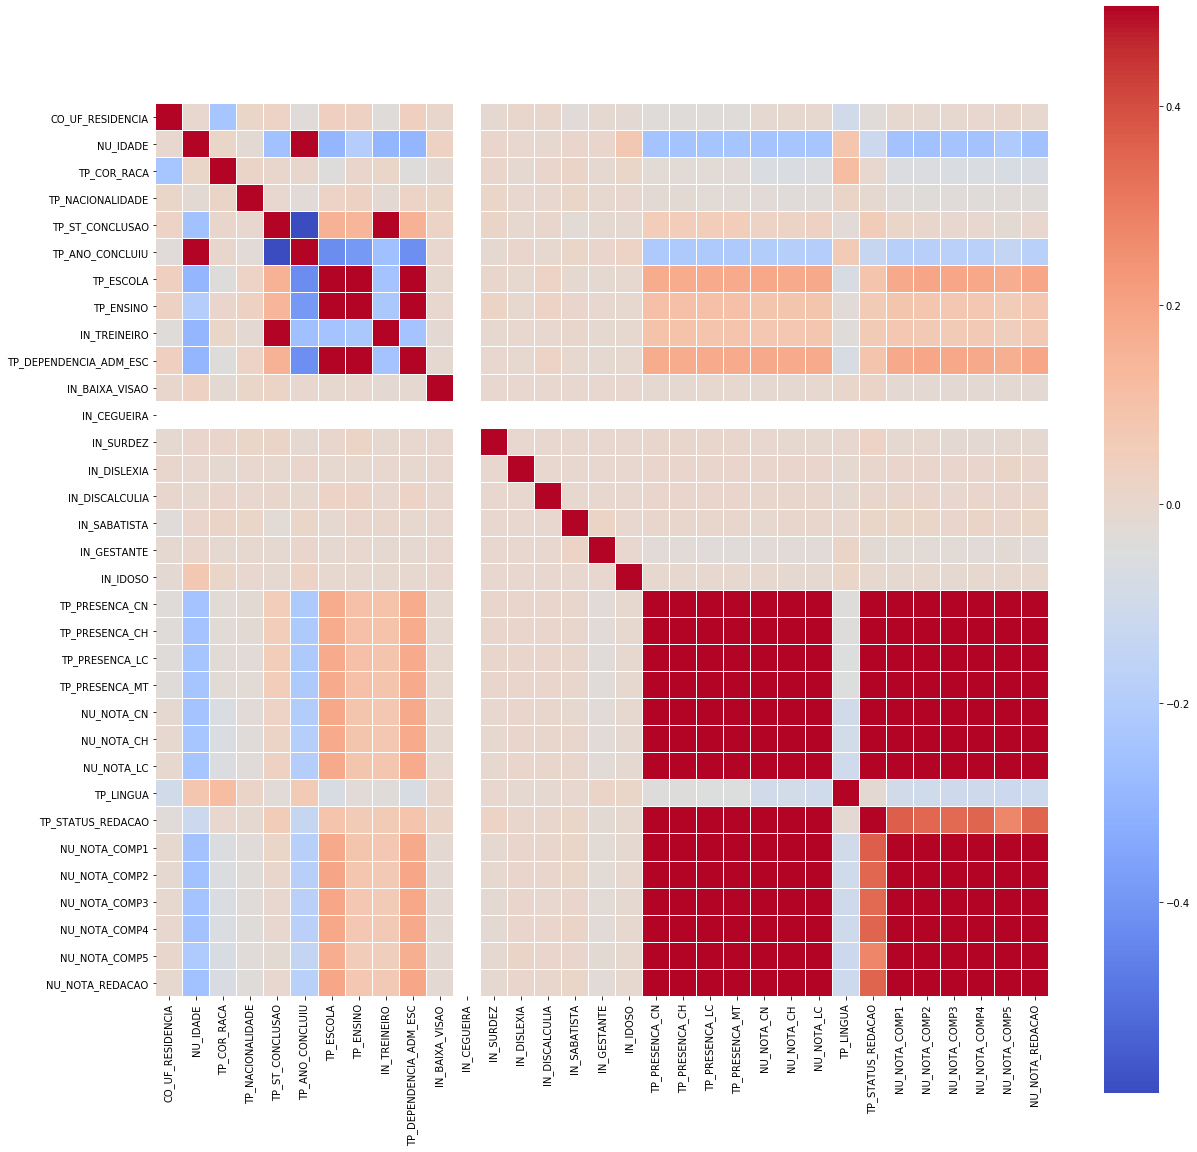

In [70]:
#Verificando a correlação utilizando um gráfico
plt.figure(figsize = (20,20))
sns.heatmap(correlacao,square=True, vmax=0.5, cmap='coolwarm', linewidths=0.01)

In [71]:
#Valores com grande correlação - selecionei eles com base na interpretação do gráfico acima 
valores_corr = ['NU_IDADE', 'TP_ST_CONCLUSAO' ,'TP_ANO_CONCLUIU', 'TP_ESCOLA']
print(valores_corr)

['NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA']


In [72]:
#Verificando a quantidade de dados faltantes
print('Quantidade de dados faltantes de data_train')
data_train.isnull().sum()

Quantidade de dados faltantes de data_train


NU_INSCRICAO              0
CO_UF_RESIDENCIA          0
SG_UF_RESIDENCIA          0
NU_IDADE                  0
TP_SEXO                   0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO                 0
IN_TREINEIRO              0
TP_DEPENDENCIA_ADM_ESC    0
IN_BAIXA_VISAO            0
IN_CEGUEIRA               0
IN_SURDEZ                 0
IN_DISLEXIA               0
IN_DISCALCULIA            0
IN_SABATISTA              0
IN_GESTANTE               0
IN_IDOSO                  0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
TP_LINGUA                 0
TP_STATUS_REDACAO         0
NU_NOTA_COMP1             0
NU_NOTA_COMP2             0
NU_NOTA_COMP3             0
NU_NOTA_COMP4             0
NU_NOTA_COMP5             0
NU_NOTA_REDACAO     

In [73]:
print('Quantidade de dados faltantes de data_test')
data_test.isnull().sum()

Quantidade de dados faltantes de data_test


NU_INSCRICAO              0
CO_UF_RESIDENCIA          0
SG_UF_RESIDENCIA          0
NU_IDADE                  0
TP_SEXO                   0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO                 0
TP_DEPENDENCIA_ADM_ESC    0
IN_BAIXA_VISAO            0
IN_CEGUEIRA               0
IN_SURDEZ                 0
IN_DISLEXIA               0
IN_DISCALCULIA            0
IN_SABATISTA              0
IN_GESTANTE               0
IN_IDOSO                  0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
TP_LINGUA                 0
TP_STATUS_REDACAO         0
NU_NOTA_COMP1             0
NU_NOTA_COMP2             0
NU_NOTA_COMP3             0
NU_NOTA_COMP4             0
NU_NOTA_COMP5             0
NU_NOTA_REDACAO           0
Q001                

In [74]:
#Colocando zero nos dados faltantes
data_train.fillna(0, inplace=True)
data_test.fillna(0, inplace=True)

In [75]:
#Me certificando de que foram trocados por zero todos os valores nulos
print(' DATA_TRAIN:',data_train.isnull().sum().sum())
print(' DATA_TEST:',data_test.isnull().sum().sum())

 DATA_TRAIN: 0
 DATA_TEST: 0


In [76]:
#Separação dos dados para treinamento e teste
x = data_train[valores_corr]
y = data_train['IN_TREINEIRO']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.33, random_state=42)


In [77]:
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(x, y)
dados_teste = data_test[valores_corr]
predicao = modelo.predict(dados_teste)
resposta = pd.DataFrame(data_test['NU_INSCRICAO'])
resposta['IN_TREINEIRO'] = predicao

In [78]:
print(resposta)

                                  NU_INSCRICAO  IN_TREINEIRO
0     ba0cc30ba34e7a46764c09dfc38ed83d15828897             0
1     177f281c68fa032aedbd842a745da68490926cd2             0
2     6cf0d8b97597d7625cdedc7bdb6c0f052286c334             1
3     5c356d810fa57671402502cd0933e5601a2ebf1e             0
4     df47c07bd881c2db3f38c6048bf77c132ad0ceb3             0
5     3f28749fb79fb059caf5aed79625a5addfd7a91a             0
6     bb2a0edddf3c59181a1496390aaaee7f32624d9d             1
7     cc7cab347fe5455aae983f3701ca40f84dc01949             0
8     95e9338f1da02f7bfa0e3194130afdccc0fb5457             1
9     155f84f2ee5b34e658f2adcc70f2ec83e37040cb             0
10    40f4566da0536c486a34ec6ba85257eaebf3255c             0
11    366749b2ea3e6023fdbfdbf7c6596dfab31885d9             0
12    52502d4aca10ad7261a4fe9983ddca1fd8b45c31             0
13    52b20639bb0294b01c9be89f80cf682ac4d9f133             0
14    1718c649736b61d49a714f2a1c0a3e37a4d7c3b4             0
15    2410aa55f6eedc95bf

In [80]:
#Salvando no arquivo csv
resposta.to_csv("answer.csv", index=False)
